In [1]:
import pandas as pd
import matplotlib as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from numpy import log
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import acf
from datetime import datetime, timedelta

In [12]:
#função para tratar campo data
def parser(x):
    return pd.datetime.strptime('190'+x, '%Y-%m')

#Agora vamos importar nosso arquivo 
df = pd.read_excel('biometria.xlsx', sheet_name='Página1')
print(df.head(10))

   Index   peso  comprimento_Total  comprimento_Padrao  comprimento_Cabeca  \
0    NaN  51.45               14.3                12.2                 4.0   
1    NaN  37.15               12.4                10.9                 3.8   
2    NaN  47.26               13.7                11.2                 3.4   
3    NaN  36.67               12.9                11.1                 3.7   
4    NaN  45.48               13.2                11.3                 3.8   
5    NaN  36.77               12.5                10.8                 3.2   
6    NaN  32.79               12.0                10.2                 3.4   
7    NaN  35.52               12.4                10.8                 3.4   
8    NaN  35.58               12.3                11.0                 3.4   
9    NaN  42.88               13.2                11.2                 3.8   

   altura  espessura       data  
0     4.1        1.9 2024-02-28  
1     3.2        1.2 2024-02-28  
2     4.0        1.7 2024-02-28  
3    

In [13]:
df = df.drop(columns=[
'data', 
'Index'
])
df.head()

,peso,comprimento_Total,comprimento_Padrao,comprimento_Cabeca,altura,espessura
0,51.45,14.3,12.2,4.0,4.1,1.9
1,37.15,12.4,10.9,3.8,3.2,1.2
2,47.26,13.7,11.2,3.4,4.0,1.7
3,36.67,12.9,11.1,3.7,3.7,1.6
4,45.48,13.2,11.3,3.8,4.5,1.6


## Creating the unseen_Data of 10% of the real data to check model results

In [14]:
data = df.sample(frac=0.9, random_state=123)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (324, 6)
Unseen Data For Predictions: (36, 6)


In [15]:
for col in data.select_dtypes(include='number').columns:
    print(col)

peso
comprimento_Total
comprimento_Padrao
comprimento_Cabeca
altura
espessura


In [16]:
# Run this cel to make sure all the variable are type float64!
#data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   peso                324 non-null    float64
 1   comprimento_Total   324 non-null    float64
 2   comprimento_Padrao  324 non-null    float64
 3   comprimento_Cabeca  324 non-null    float64
 4   altura              324 non-null    float64
 5   espessura           324 non-null    float64
dtypes: float64(6)
memory usage: 15.3 KB


In [15]:
#from pycaret.datasets import get_data
#boston = get_data('boston')
from pycaret.regression import *
exp_name = setup(data = df1,  target = 'peso')
best_model = compare_models()

,Description,Value
0,Session id,268
1,Target,peso
2,Target type,Regression
3,Original data shape,"(360, 6)"
4,Transformed data shape,"(360, 6)"
5,Transformed train set shape,"(251, 6)"
6,Transformed test set shape,"(109, 6)"
7,Numeric features,4
8,Categorical features,1
9,Preprocess,True


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,3.8965,28.9635,5.2496,0.9809,0.0560,0.0461,0.0650
et,Extra Trees Regressor,3.9568,32.9524,5.5424,0.9783,0.0585,0.0467,0.0550
gbr,Gradient Boosting Regressor,4.2100,34.5229,5.7560,0.9769,0.0610,0.0501,0.0430
lightgbm,Light Gradient Boosting Machine,4.2504,35.7237,5.7838,0.9767,0.0606,0.0504,0.0630
ada,AdaBoost Regressor,4.3173,37.4183,5.9242,0.9755,0.0739,0.0577,0.0380
xgboost,Extreme Gradient Boosting,4.2843,36.9765,5.9244,0.9753,0.0647,0.0519,0.1160
lasso,Lasso Regression,5.4185,50.4528,6.9996,0.9664,0.1006,0.0751,0.0180
llar,Lasso Least Angle Regression,5.4191,50.4726,7.0010,0.9663,0.1006,0.0751,0.0170
dt,Decision Tree Regressor,5.0758,50.9990,7.0722,0.9648,0.0754,0.0605,0.0180
lr,Linear Regression,5.5498,73.9612,7.7681,0.9514,0.1185,0.0805,2.3860


In [16]:
rf = create_model('rf')

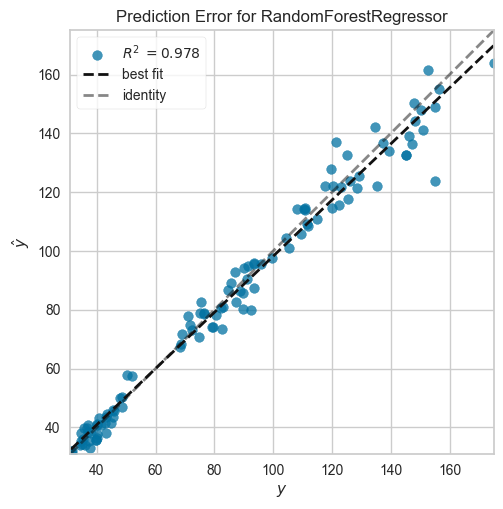

In [17]:
plot_model(rf, plot = 'error')

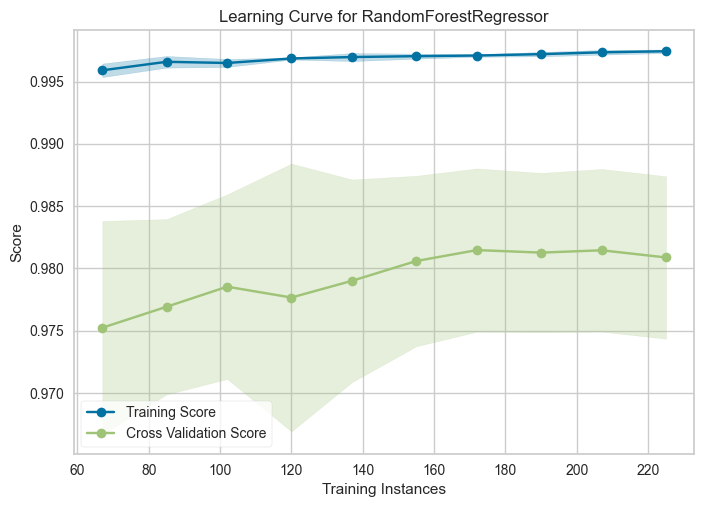

In [18]:
plot_model(rf, plot = 'learning')

In [19]:
#plot_model(rf, plot = 'tree')

In [20]:
evaluate_model(rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [21]:
pred_holdout = predict_model(rf)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,4.1999,35.1091,5.9253,0.9777,0.0614,0.0489


In [22]:
df2 = df.drop(columns=[
'data', 
'Index',
'peso'
])
df2.head()

,comprimento_Total,comprimento_Padrao,comprimento_Cabeça,altura,espessura
0,14.3,12.2,4,4.1,1.9
1,12.4,10.9,3.8,3.2,1.2
2,13.7,11.2,3.4,4.0,1.7
3,12.9,11.1,3.7,3.7,1.6
4,13.2,11.3,3.8,4.5,1.6


In [23]:
from pycaret.regression import *
exp_name = setup(data = df2,  target = 'espessura')
best_model = compare_models()

,Description,Value
0,Session id,2781
1,Target,espessura
2,Target type,Regression
3,Original data shape,"(360, 5)"
4,Transformed data shape,"(360, 5)"
5,Transformed train set shape,"(251, 5)"
6,Transformed test set shape,"(109, 5)"
7,Numeric features,3
8,Categorical features,1
9,Preprocess,True


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,0.0849,0.0140,0.1132,0.8487,0.0373,0.0422,0.0170
huber,Huber Regressor,0.0850,0.0140,0.1135,0.8484,0.0374,0.0422,0.0230
br,Bayesian Ridge,0.0852,0.0141,0.1139,0.8473,0.0375,0.0424,0.0180
lar,Least Angle Regression,0.0856,0.0142,0.1142,0.8471,0.0377,0.0426,0.0160
lr,Linear Regression,0.0857,0.0142,0.1144,0.8467,0.0379,0.0427,0.0170
omp,Orthogonal Matching Pursuit,0.0873,0.0151,0.1178,0.8360,0.0388,0.0437,0.0170
lightgbm,Light Gradient Boosting Machine,0.0950,0.0178,0.1284,0.8124,0.0425,0.0475,0.0630
par,Passive Aggressive Regressor,0.0969,0.0180,0.1294,0.8059,0.0424,0.0480,0.0170
rf,Random Forest Regressor,0.0965,0.0189,0.1324,0.8000,0.0435,0.0482,0.0610
knn,K Neighbors Regressor,0.0940,0.0199,0.1364,0.7896,0.0446,0.0461,0.0220


In [29]:
ridge = create_model('ridge')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0700,0.0070,0.0834,0.9083,0.0282,0.0371
1,0.0747,0.0089,0.0944,0.9008,0.0308,0.0370
2,0.0815,0.0107,0.1033,0.9185,0.0310,0.0367
3,0.0997,0.0424,0.2059,0.4882,0.0643,0.0427
4,0.0978,0.0169,0.1301,0.7794,0.0406,0.0459
5,0.0788,0.0084,0.0918,0.9284,0.0306,0.0406
6,0.0774,0.0075,0.0864,0.9230,0.0302,0.0418
7,0.0913,0.0143,0.1197,0.8873,0.0441,0.0505
8,0.0901,0.0128,0.1132,0.8608,0.0380,0.0450


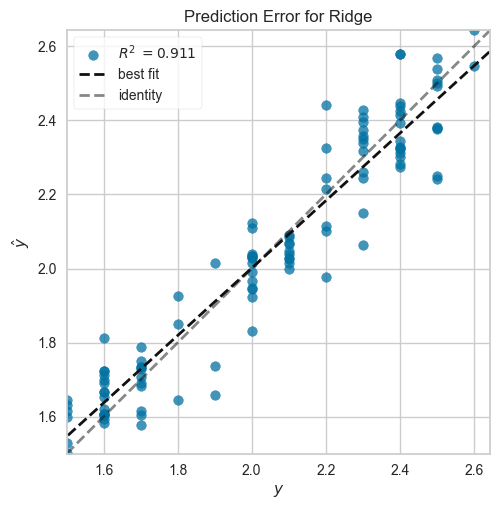

In [30]:
plot_model(ridge, plot = 'error')

In [31]:
evaluate_model(ridge)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [26]:
#pred_unseen = predict_model(rf, data = unseen_dataframe)

In [27]:
tuned_rf = tune_model(rf)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0577,0.0064,0.0802,0.9153,0.0276,0.0300
1,0.0640,0.0072,0.0849,0.9198,0.0285,0.0322
2,0.0880,0.0160,0.1265,0.8778,0.0378,0.0399
3,0.1159,0.0376,0.1938,0.5466,0.0603,0.0507
4,0.0819,0.0149,0.1219,0.8064,0.0390,0.0391
5,0.0580,0.0057,0.0757,0.9512,0.0248,0.0283
6,0.0841,0.0102,0.1011,0.8945,0.0346,0.0443
7,0.0855,0.0174,0.1320,0.8630,0.0485,0.0473
8,0.0840,0.0140,0.1183,0.8478,0.0407,0.0427


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [28]:
#theta = exp.create_model('theta')
#exp.plot_model(plot = 'decomp',
#               data_kwargs = {'type' : 'multiplicative'},
#               fig_kwargs = {"height":500,"width":1000,"template": "simple_white","hoverinfo":"none","big_data_threshold":50})
#exp.plot_model(estimator = theta, plot = 'forecast', 
#               data_kwargs = {'fh' : 8},
#               fig_kwargs = {"height":500,"width":1000,"template": "simple_white","hoverinfo":"none","big_data_threshold":50})
#exp.predict_model(theta, fh = 8)

#### weight prediction 
#### Realizar um codigo padrao com avaliacao de modelos, tuning, evaluation, shuffle and save (retirar index)
#### realizar predicao para espessura
#### realizar a predicao do peso sem a variavel espessura
####